Diabetes Prediction Using Decision Tree and Random Forest

Tujuan dari pembuatan adalah untuk membuat model dan membandingkan metode mana yang terbaik untuk digunakan dalam memprediksi diabetes pada seseorang dengan berbagai macam variabel. Data yang digunakan sebelumnya telah dibersihkan dan dihilangkan beberapa variabel yang tidak terkait dengan tujuan bisnis. Sehingga proses data pre-processing tidak akan dilakukan.

Step yang dilakukan ada 3 yaitu


1.   Reading and Understanding Data
2.   Expolatory Data Analysis
3.   Model Building

# Reading and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Data_Final.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  GenHlth               229474 non-null  float64
 13  MentHlth              229474 non-null  float64
 14  PhysHlth              229474 non-null  float64
 15  

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [ ]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
229469,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
229470,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
229471,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
229472,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0
229473,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0


In [ ]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
dtype: object

In [ ]:
df.shape

(229474, 18)

In [ ]:
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40,1,0,0,0,0,1,0,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,5,30,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,2,0,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,2,3,0,0,0,11


# Exploratory Data Analysis

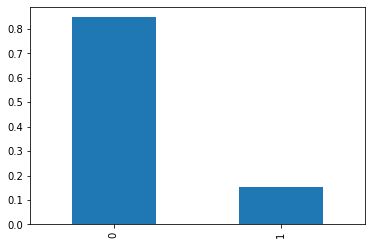

In [ ]:
df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar');

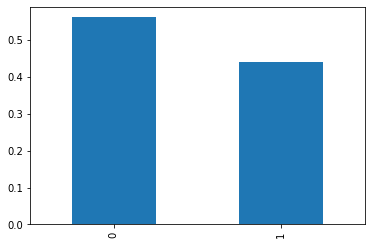

In [ ]:
df['Sex'].value_counts(normalize=True).plot(kind='bar');

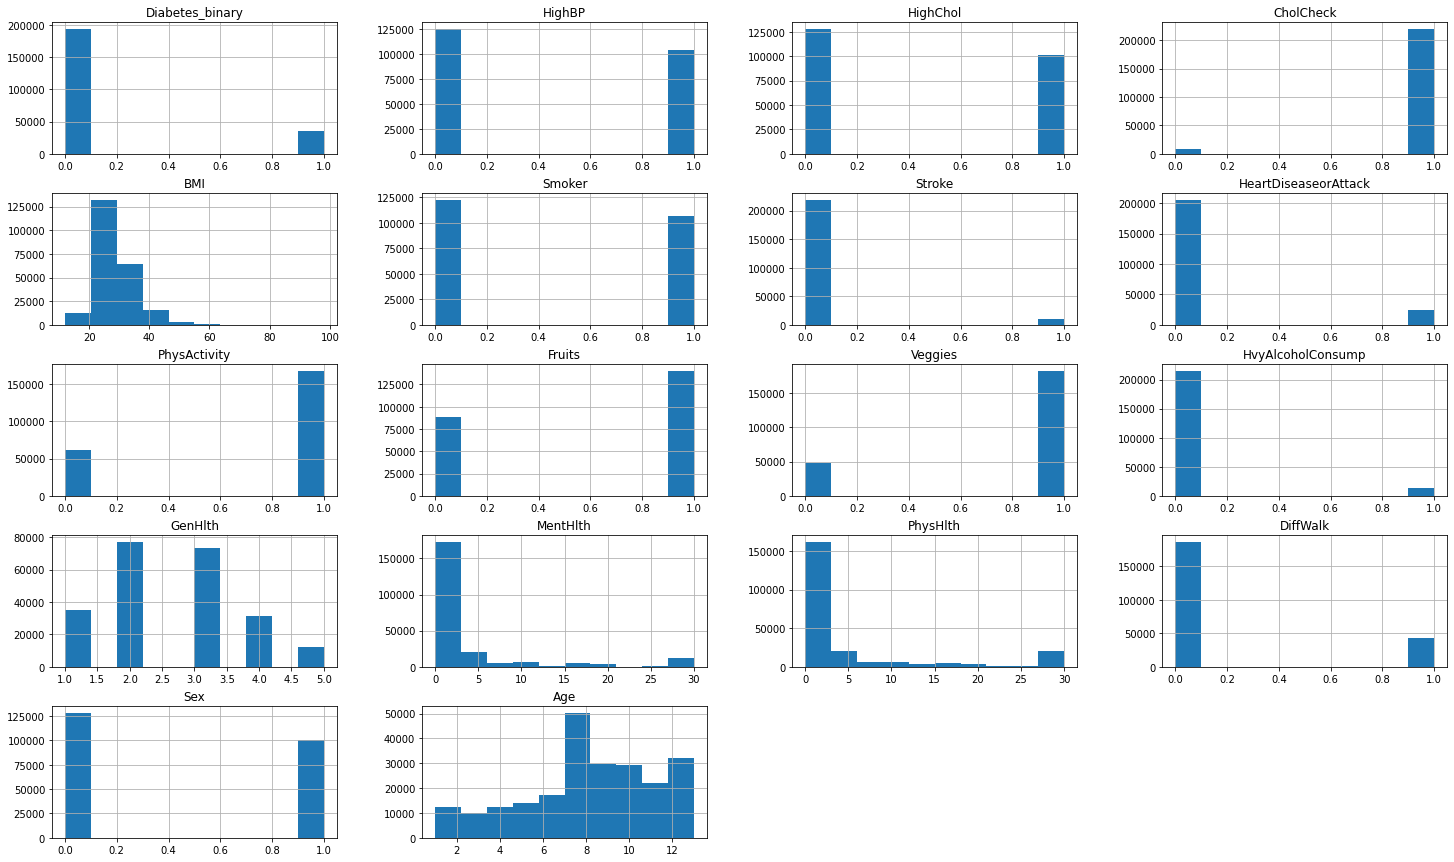

In [ ]:
df.hist(figsize=(25,15));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


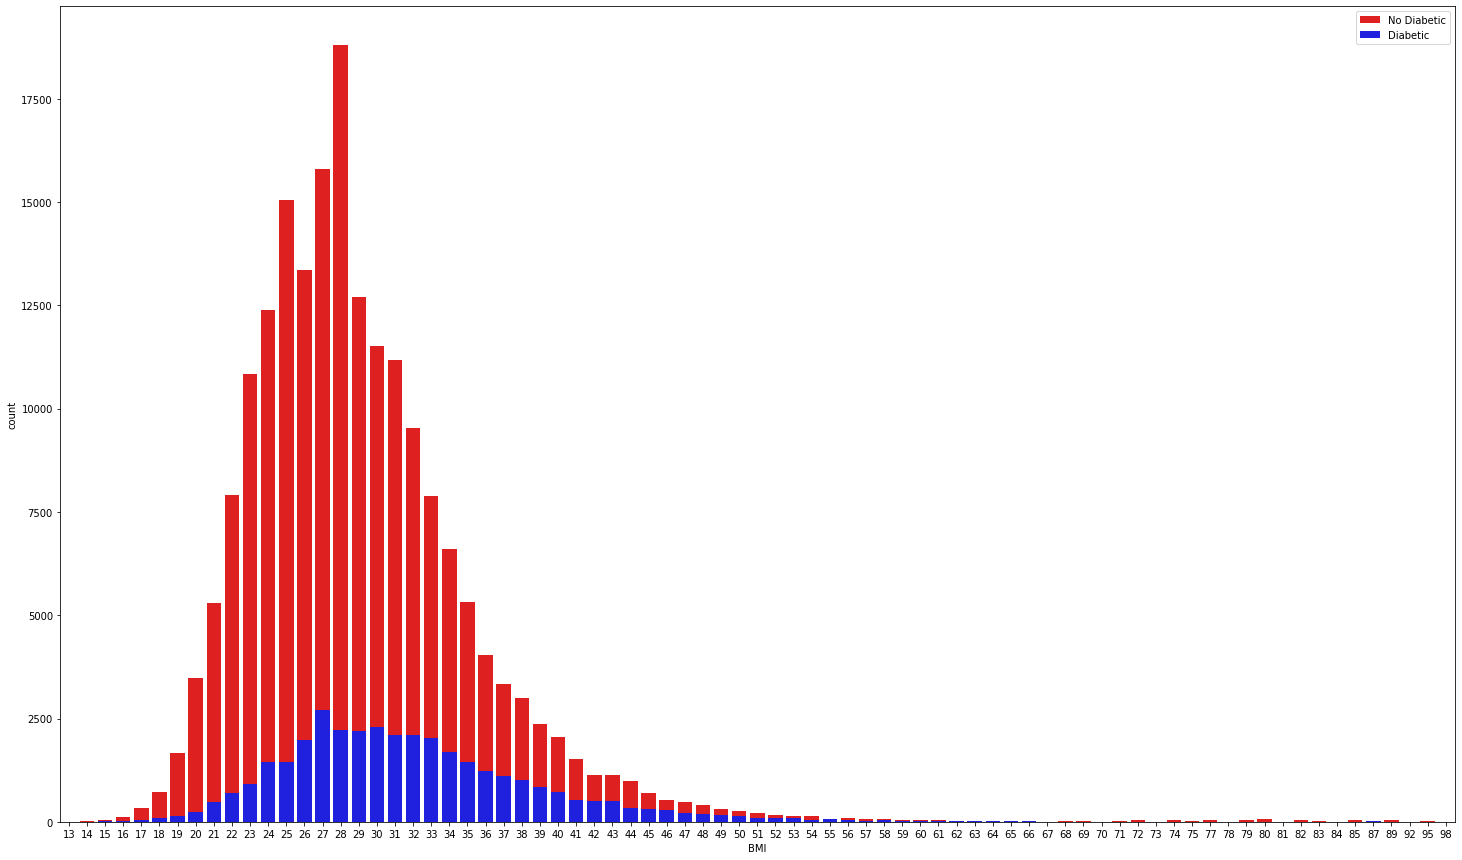

In [ ]:
plt.figure(figsize=(25, 15))

sns.countplot(df.BMI[df.Diabetes_binary == 0], color='r', label="No Diabetic")
sns.countplot(df.BMI[df.Diabetes_binary == 1], color='b', label="Diabetic")

plt.legend()

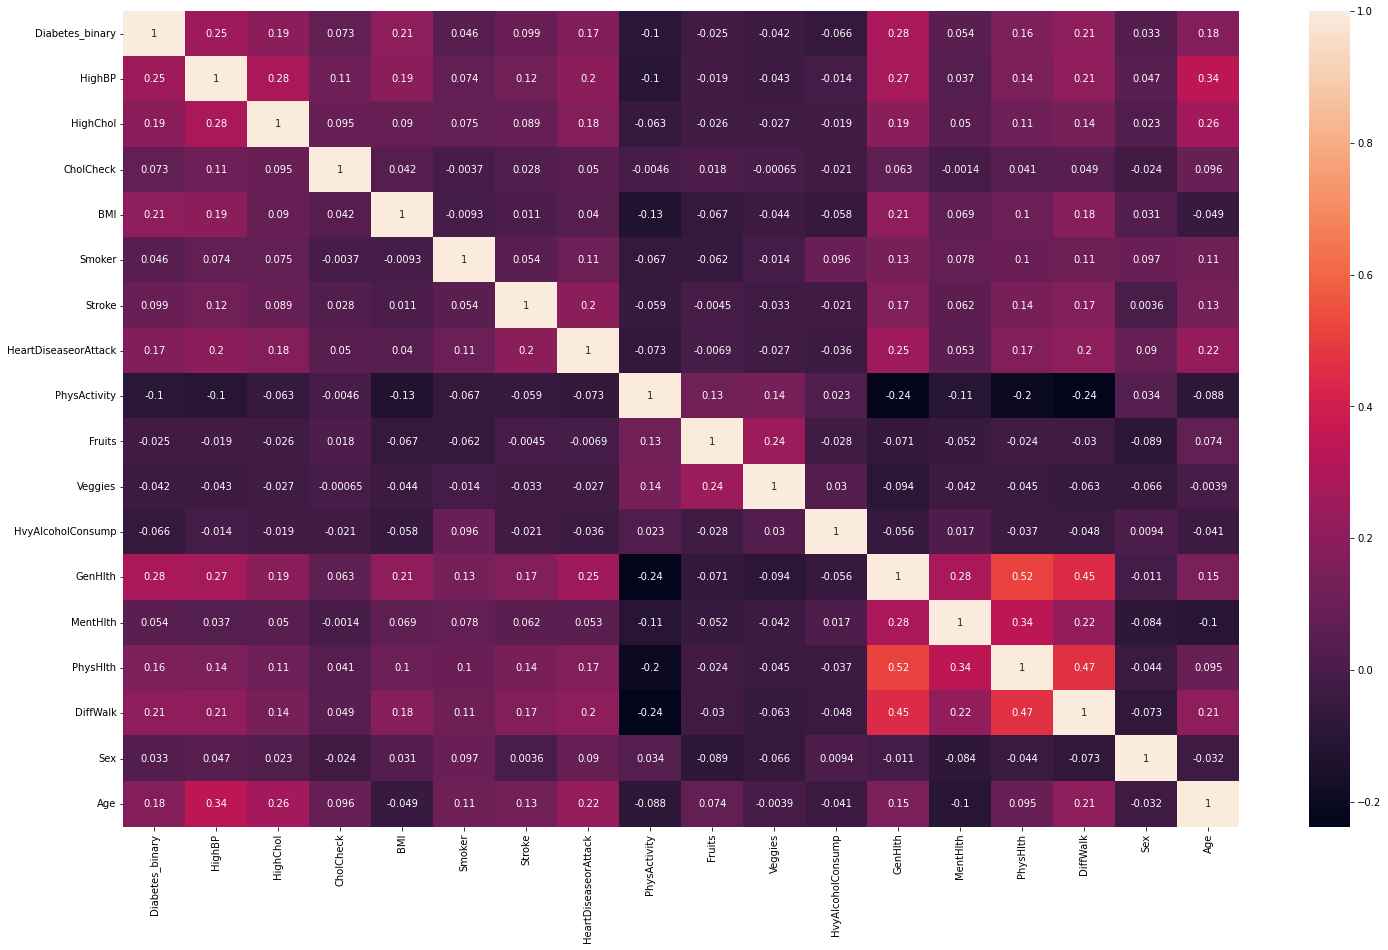

In [ ]:
plt.figure(figsize = [25 , 15])
sns.heatmap(df.corr(), annot = True)
plt.show()

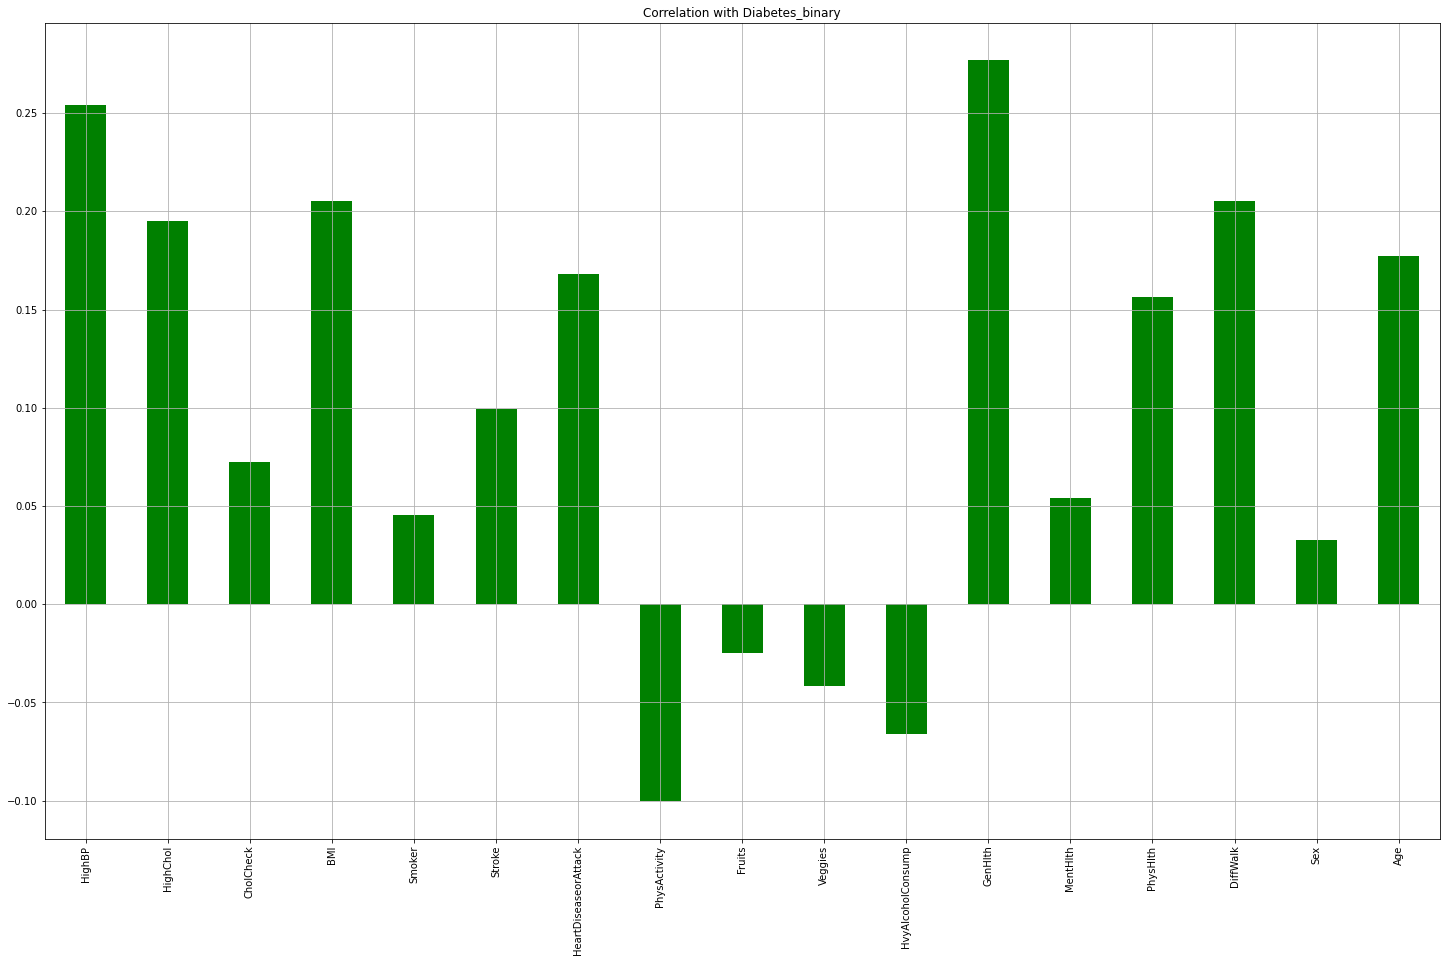

In [ ]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(25, 15)
, title="Correlation with Diabetes_binary",color='g');

# Model Building

In [ ]:
dropdata = ["Fruits" , "Veggies" , "HvyAlcoholConsump" , "PhysActivity"]

In [ ]:
df.drop(dropdata , axis= 1 ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   GenHlth               229474 non-null  int64
 9   MentHlth              229474 non-null  int64
 10  PhysHlth              229474 non-null  int64
 11  DiffWalk              229474 non-null  int64
 12  Sex                   229474 non-null  int64
 13  Age                   229474 non-null  int64
dtypes: int64(14)
memory usage: 24.5 MB


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop("Diabetes_binary",axis=1)
y = df["Diabetes_binary"]
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3 , random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=12)

In [ ]:
y_pred=dt.predict(x_test)

print('Training set score: {:.4f}'.format(dt.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(x_test, y_test)))

import math

mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Training set score: 0.8645
Test set score: 0.8447
Mean Squared Error : 0.15532443385674652
Root Mean Squared Error : 0.3941122097280754


In [ ]:
rf = RandomForestClassifier( max_depth= 12, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=42)

In [ ]:
y_pred=rf.predict(x_test)

print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))


mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Training set score: 0.8646
Test set score: 0.8516
Mean Squared Error : 0.14836657321732058
Root Mean Squared Error : 0.38518381743957075
